# Automatidata project 
**Course 4 - The Power of Statistics**

You are a data professional in a data consulting firm, called Automatidata. The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. A follow-up email from Luana includes your specific assignment: to conduct an A/B test. 

A notebook was structured and prepared to help you in this project. Please complete the following questions.


# Course 4 End-of-course project: Statistical analysis

In this activity, you will practice using statistics to analyze and interpret data. The activity covers fundamental concepts such as descriptive statistics and hypothesis testing. You will explore the data provided and conduct A/B and hypothesis testing.  
<br/>   

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.
  
*This activity has four parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct EDA and hypothesis testing
* How did computing descriptive statistics help you analyze your data? 

* How did you formulate your null hypothesis and alternative hypothesis? 

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your A/B test?

* What business recommendations do you propose based on your results?

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 

# **Conduct an A/B test**


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.


==> ENTER YOUR RESPONSE HERE 

*Complete the following steps to perform statistical analysis of your data:* 

### Task 1. Imports and data loading

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

<details>
  <summary><h4><strong>Hint: </strong></h4></summary>

Before you begin, recall the following Python packages and functions that may be useful:

*Main functions*: stats.ttest_ind(a, b, equal_var)

*Other functions*: mean() 

*Packages*: pandas, stats.scipy

</details>

In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# Load dataset into dataframe
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Analyze and Construct**

In this stage, consider the following questions where applicable to complete your code response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


* Descriptive statistics are useful because they are a way of quickly exploring and understanding large amounts of data.

### Task 2. Data exploration

Use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

<details>
  <summary><h4><strong>Hint: </strong></h4></summary>

Refer back to *Self Review Descriptive Statistics* for this step-by-step proccess.

</details>

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



You are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

In [50]:
def check_df(dataframe, head =5):
    print('########## Shape #########')
    print(dataframe.shape)
    print('########## DTypes #########')
    print(dataframe.dtypes)
    print('########## NA ##########')
    print(dataframe.isnull().sum())
    print('########## Quantiles ##########')
    numeric_columns = dataframe.select_dtypes(include = ['number']).columns
    print(dataframe[numeric_columns].quantile([0, 0.05, 0.50, 0.95, 0.99]))

In [51]:
check_df(df)

########## Shape #########
(22699, 17)
########## DTypes #########
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object
########## NA ##########
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax  

In [52]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [53]:
df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
22689,2,03/07/2017 12:25:52 PM,03/07/2017 12:39:40 PM,1,1.96,1,N,113,13,1,11.0,0.0,0.5,2.36,0.00,0.3,14.16
22690,2,09/21/2017 1:44:42 PM,09/21/2017 1:52:06 PM,1,0.89,1,N,43,142,1,7.0,0.0,0.5,1.95,0.00,0.3,9.75
22691,2,01/06/2017 1:50:14 AM,01/06/2017 1:56:47 AM,1,2.12,1,N,170,79,1,8.0,0.5,0.5,0.00,0.00,0.3,9.30
22692,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35
22693,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56
22694,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00
22698,1,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,1,2.10,1,N,239,236,1,11.0,0.0,0.5,2.35,0.00,0.3,14.15


In [17]:
df.reset_index(drop=True, inplace=True) # Reset Index Columns

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,22699.0,1.556236,0.496838,1.0,1.00,2.00,2.00,2.00
passenger_count,22699.0,1.642319,1.285231,0.0,1.00,1.00,2.00,6.00
trip_distance,22699.0,2.913313,3.653171,0.0,0.99,1.61,3.06,33.96
RatecodeID,22699.0,1.043394,0.708391,1.0,1.00,1.00,1.00,99.00
PULocationID,22699.0,162.412353,66.633373,1.0,114.00,162.00,233.00,265.00
DOLocationID,22699.0,161.527997,70.139691,1.0,112.00,162.00,233.00,265.00
payment_type,22699.0,1.336887,0.496211,1.0,1.00,1.00,2.00,4.00
fare_amount,22699.0,13.026629,13.243791,-120.0,6.50,9.50,14.50,999.99
extra,22699.0,0.333275,0.463097,-1.0,0.00,0.00,0.50,4.50
mta_tax,22699.0,0.497445,0.039465,-0.5,0.50,0.50,0.50,0.50


In [32]:
df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [54]:
df.groupby('payment_type')['total_amount'].mean()

payment_type
1    17.663577
2    13.545821
3    13.579669
4    11.238261
Name: total_amount, dtype: float64

In [56]:
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

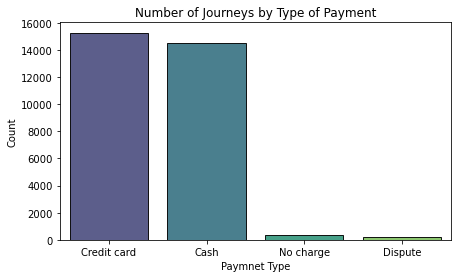

In [46]:
paymnet_type_count = df['payment_type'].groupby(df['payment_type']).sum()

plt.figure(figsize=(7,4))
ax = sns.barplot(x=paymnet_type_count.index,
                 y=paymnet_type_count,
                 palette='viridis',
                 alpha=0.9,
                 edgecolor='black')

ax.set_xlabel('Paymnet Type')
ax.set_ylabel('Count')
ax.set_title('Number of Journeys by Type of Payment')
ax.set_xticklabels(['Credit card', 'Cash', 'No charge', 'Dispute'])
plt.show()

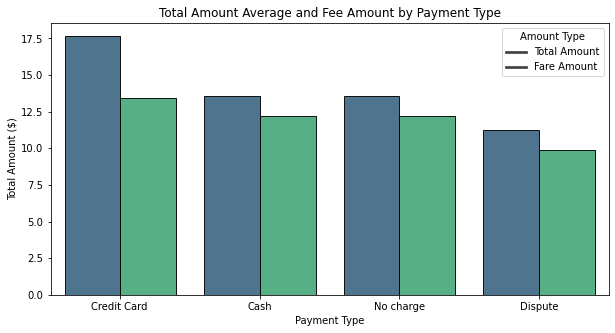

In [41]:
payment_type_total_amount = df.groupby('payment_type')[['total_amount', 'fare_amount']].mean()

payment_melted = payment_type_total_amount.reset_index().melt(
    id_vars='payment_type',
    value_vars=['total_amount', 'fare_amount'],
    var_name='Amount Type',
    value_name='Amount'
)


plt.figure(figsize=(10, 5))
ax = sns.barplot(x='payment_type',
                 y='Amount',
                 hue='Amount Type',
                 data=payment_melted,
                 palette='viridis',
                 alpha=0.9,
                 edgecolor='black')


ax.set_xlabel('Payment Type')
ax.set_ylabel('Total Amount ($)')
ax.set_title('Total Amount Average and Fee Amount by Payment Type')
ax.set_xticklabels(['Credit Card ', 'Cash', 'No charge', 'Dispute'])


plt.legend(title='Amount Type', labels=['Total Amount', 'Fare Amount'])
plt.show()

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.


### Task 3. Hypothesis testing

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. Consider your hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



**Note:** For the purpose of this exercise, your hypothesis test is the main component of your A/B test. 

You choose 5% as the significance level and proceed with a two-sample t-test.

In [60]:
# 1. Data preparation
credit_card = df[df['payment_type'] == 1]['total_amount']  # Credit card payments
cash = df[df['payment_type'] == 2]['total_amount']  # Cash payments

# 2. Descriptive statistics
print("Credit Card Payment Statistics:")
print(f"Average payment: ${credit_card.mean():.2f}")
print(f"Median payment: ${credit_card.median():.2f}")
print(f"Standard Deviation: ${credit_card.std():.2f}")
print(f"Minimum: ${credit_card.min():.2f}")
print(f"Maximum: ${credit_card.max():.2f}")
print(f"Sample number: {len(credit_card)}")

print("\nCash Payment Statistics:")
print(f"Average Payment: ${cash.mean():.2f}")
print(f"Median Paymnet: ${cash.median():.2f}")
print(f"Standard Deviation: ${cash.std():.2f}")
print(f"Minimum: ${cash.min():.2f}")
print(f"Maximum: ${cash.max():.2f}")
print(f"Sample Number: {len(cash)}")

Credit Card Payment Statistics:
Average payment: $17.66
Median payment: $12.95
Standard Deviation: $17.40
Minimum: $0.00
Maximum: $1200.29
Sample number: 15265

Cash Payment Statistics:
Average Payment: $13.55
Median Paymnet: $9.80
Standard Deviation: $12.39
Minimum: $0.00
Maximum: $450.30
Sample Number: 7267


In [74]:
# 3. Hypothesis testing
alpha = 0.05
t_stat, p_value = stats.ttest_ind(credit_card, cash, equal_var=False, alternative="two-sided")


# 4. Sonuçları görselleştirme ve raporlama
print("\nT-test Results:")
print(f"t-statistic: {t_stat:.8f}")
print(f"p-value: {p_value}")
print(f"Significance level: {alpha}")

if p_value < alpha:
    print("\nResult: We reject the null hypothesis.")
    print("There is a statistically significant difference between the average fee amounts for credit card and cash payments.")
    if credit_card.mean() > cash.mean():
        print(f"Average cost of trips paid by credit card (${credit_card.mean():.2f}), "
              f"from cash-paid trips (${cash.mean():.2f}) is higher..")
    else:
        print(f"Average fare for trips paid in cash (${cash.mean():.2f}), "
              f"trips paid by credit card(${credit_card.mean():.2f}) is higher.")
else:
    print("\nResult: We cannot reject the null hypothesis.")
    print("There is no statistically significant difference between the average fee amounts for credit card and cash payments.")


T-test Results:
t-statistic: 20.34644023
p-value: 4.5301445359736376e-91
Significance level: 0.05

Result: We reject the null hypothesis.
There is a statistically significant difference between the average fee amounts for credit card and cash payments.
Average cost of trips paid by credit card ($17.66), from cash-paid trips ($13.55) is higher..


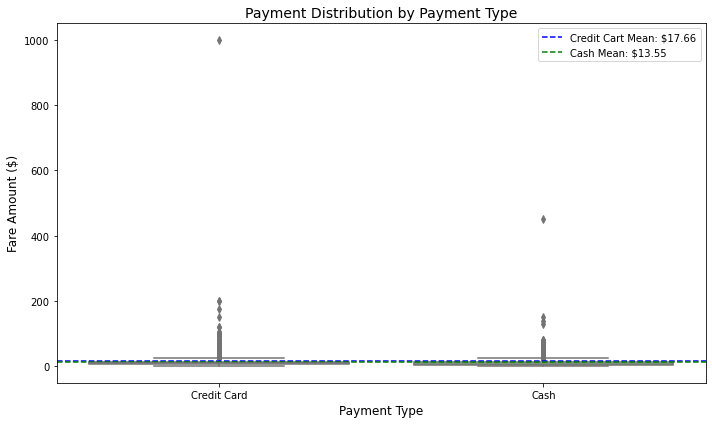

In [79]:
# Result Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='fare_amount', data=df[df['payment_type'].isin([1, 2])],
            palette=['lightblue', 'lightgreen'])
plt.axhline(y=credit_card.mean(), color='blue', linestyle='--',
            label=f'Credit Cart Mean: ${credit_card.mean():.2f}')
plt.axhline(y=cash.mean(), color='green', linestyle='--',
            label=f'Cash Mean: ${cash.mean():.2f}')
plt.title('Payment Distribution by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.xticks([0, 1], ['Credit Card', 'Cash'])
plt.legend()
plt.tight_layout()
plt.show()

**We reject the null hypothesis.**
* There is a statistically significant difference between the average fee amounts for credit card and cash payments.Average cost of trips paid by credit card (17.66), from cash-paid trips (13.55) is higher..

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4. Communicate insights with stakeholders

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?
2. Consider why this A/B test project might not be realistic, and what assumptions had to be made for this educational project.

* This project operates under the assumption that passengers had to pay one way or the other and consistently adhered to this requirement.The data was not collected this way, so an assumption had to be made. The data was grouped randomly for an A/B test. This dataset doesn't consider other explanations, like passengers not carrying large amounts of cash, which could make paying for long or distant trips with a credit card more convenient. The fare amount usually determines the payment type.The discrepancy between the average card payment fare and the cash fare is due to the use of the total amount as the comparing variable. However, cash fares all have tip values of $0, while card payments have non-zero values.One potential explanation for this is the absence of declared cash tips. We can capture tips in one group but not the other.We could compare the fare_amount column.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.